<a href="https://colab.research.google.com/github/fcalderan19/TA047R-2C2025-GRUPO02/blob/main/TA047R_TP1_GRUPO2_ENTREGA_EJ3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 3 - Modelos de Regresión

# Grupo 2 - G2 - Integrantes:

- Calderan, Facundo Andres
- Merlinsky Camins, Mariano Gabriel
- Castellano Bogdan, Benjamin
- Yu, Fernando
- Pons Echeverria, Tomas

# 1. Análisis Exploratorio y Preprocesamiento

## 1.1 Lectura e Interpretación del dataset


Vamos leer el archivo .csv que tiene toda la informacion

In [1]:
import pandas as pd
!wget https://data.insideairbnb.com/italy/lazio/rome/2025-06-12/data/listings.csv.gz -O listings.csv.gz
!gunzip listings.csv.gz

# El dataset es grande, asi que ejecuto estas lineas
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)


dataset = pd.read_csv("listings.csv")

dataset.head()

--2025-10-14 23:17:34--  https://data.insideairbnb.com/italy/lazio/rome/2025-06-12/data/listings.csv.gz
Resolving data.insideairbnb.com (data.insideairbnb.com)... 13.35.37.68, 13.35.37.7, 13.35.37.113, ...
Connecting to data.insideairbnb.com (data.insideairbnb.com)|13.35.37.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21130106 (20M) [application/x-gzip]
Saving to: ‘listings.csv.gz’

listings.csv.gz     100%[===================>]  20.15M  --.-KB/s    in 0.09s   

2025-10-14 23:17:34 (222 MB/s) - ‘listings.csv.gz’ saved [21130106/21130106]



,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2737,https://www.airbnb.com/rooms/2737,20250612050804,2025-06-26,city scrape,"Elif's room in cozy, clean flat.",10 min by bus you can get to Piazza Venezia or...,It used to be an industrial area until late 80...,https://a0.muscache.com/pictures/41225252/e955...,3047,https://www.airbnb.com/users/show/3047,Elif,2008-09-18,"Rome, Italy",I am a Turkish-Italian who was born in Istanbu...,within a day,50%,0%,f,https://a0.muscache.com/im/pictures/user/User/...,https://a0.muscache.com/im/pictures/user/User/...,Testaccio,7.0,7.0,"['email', 'phone']",t,t,"Rome, Lazio, Italy",VIII Appia Antica,NaN,41.871360,12.482150,Private room,Private room,1,1.5,1.5 baths,1.0,1.0,"[""Cleaning products"", ""Dryer"", ""Bed linens"", ""...",$68.00,31,1125,31.0,31.0,1125.0,1125.0,31.0,1125.0,NaN,t,30,60,90,365,2025-06-26,5,0,0,189,0,0,0.0,2014-12-26,2015-05-08,4.80,4.60,4.60,4.80,5.00,4.40,4.40,NaN,f,6,0,6,0,0.04
1,3079,https://www.airbnb.com/rooms/3079,20250612050804,2025-06-27,city scrape,Cozy apartment (2-4)with Colisseum view,With the view of the Colisseum from the front ...,Monti neighborhood is one of the best areas in...,https://a0.muscache.com/pictures/miso/Hosting-...,3504,https://www.airbnb.com/users/show/3504,Laura,2008-10-08,"Rome, Italy",I've a degree in Art History\r\n,within a few hours,100%,0%,f,https://a0.muscache.com/im/users/3504/profile_...,https://a0.muscache.com/im/users/3504/profile_...,Monti,6.0,11.0,"['email', 'phone']",t,t,"Rome, Lazio, Italy",I Centro Storico,NaN,41.895000,12.491170,Entire rental unit,Entire home/apt,4,1.0,1 bath,1.0,1.0,"[""Dryer"", ""Bed linens"", ""Luggage dropoff allow...",$140.00,31,180,31.0,31.0,180.0,180.0,31.0,180.0,NaN,t,30,60,72,334,2025-06-27,21,0,0,157,0,0,0.0,2011-01-02,2022-04-30,4.53,4.38,4.62,4.71,4.86,4.81,4.43,NaN,f,6,6,0,0,0.12
2,11834,https://www.airbnb.com/rooms/11834,20250612050804,2025-06-27,city scrape,"Charming Boschetto Studio, Rome",Fantastic apartment in the Monti district. The...,"""Monti"" with its narrow cobblestone alleys, cr...",https://a0.muscache.com/pictures/miso/Hosting-...,44552,https://www.airbnb.com/users/show/44552,Serena,2009-10-09,"Rome, Italy","Hello I'm Serena I was born and live in Rome, ...",within a few hours,100%,97%,t,https://a0.muscache.com/im/users/44552/profile...,https://a0.muscache.com/im/users/44552/profile...,Monti,1.0,2.0,"['email', 'phone']",t,t,"Rome, Lazio, Italy",I Centro Storico,NaN,41.895447,12.491181,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Cleaning products"", ""Bed linens"", ""Dining ta...",$130.00,2,28,2.0,2.0,28.0,28.0,2.0,28.0,NaN,t,0,0,

Vamos a estudiar el dataset, mirando su tamaño y entendiendo mejor la información que contiene

In [2]:
dataset.shape

(36309, 79)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36309 entries, 0 to 36308
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36309 non-null  int64  
 1   listing_url                                   36309 non-null  object 
 2   scrape_id                                     36309 non-null  int64  
 3   last_scraped                                  36309 non-null  object 
 4   source                                        36309 non-null  object 
 5   name                                          36309 non-null  object 
 6   description                                   35330 non-null  object 
 7   neighborhood_overview                         17656 non-null  object 
 8   picture_url                                   36309 non-null  object 
 9   host_id                                       36309 non-null 

## 1.2 Ingenieria de Features

Luego de darle un primer vistazo al dataset, vemos que hay muchas columnas, y nos gustaria quedarnos con aquellas que realmente nos aporten valor. Sabiendo que es el precio lo que nosotros vamos a querer predecir, no tendremos en cuenta identificadores, urls o imagenes, textos largos y columnas que esten completamente vacias.

Además, no tendremos en cuenta columnas que en un escenario real, y en el momento de predecir un nuevo alquiler, a priori podríamos no tener.

In [4]:
eliminadas = [
    "id", "listing_url", "scrape_id", "host_id", "host_url", "last_scraped",
    "host_thumbnail_url", "name", "description", "neighborhood_overview",
    "host_name", "host_about", "bathrooms_text", "license", "calendar_last_scraped",
    "picture_url", "host_picture_url", "calendar_updated", "neighbourhood_group_cleansed",
    "source", "estimated_revenue_l365d", "estimated_occupancy_l365d", "number_of_reviews",
    "number_of_reviews_ltm", "number_of_reviews_l30d", "number_of_reviews_ly", "reviews_per_month",
    "reviews_per_month", "first_review", "last_review", "review_scores_rating", "review_scores_accuracy",
    "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication",
    "review_scores_location", "review_scores_value",]
dataset.drop(columns=eliminadas, inplace=True)

Asumimos que las columnas de review no van a existir para un alquiler nuevo, lo cual podría ser información que nuestros modelos aprovechen para entrenar pero de la cual no van a disponer en la realidad, entonces, las eliminamos del dataset y obligamos al modelo a entrenarse a partir de datos que si va a tener a disposición.

Después de un estudio externo de las variables del dataset, mediante la pagina de la cual descargamos el archivo original, la variables de tipo texto *room_type* tiene 4 valores posibles y "host_response_time" tiene 5. Vamos a usar One Hot Encoding para estas, ya que son variables cualitativas nominales, y de esta forma el modelo se pueda entrenar correctamente a partir de ellas.

In [5]:
dataset = pd.get_dummies(dataset, columns=["room_type"], drop_first=True)
dataset = pd.get_dummies(dataset, columns=['host_response_time'], drop_first=True, dummy_na=True)


Queremos remarcar que se puede pensar que existe una correlacion entre columnas, por ejemplo que las columnas ["availability_30", "availability_60", "availability_90", "availability_365"] se pueden calcular una a partir de la otra. Es más, se puede ver en el siguiente grafico:

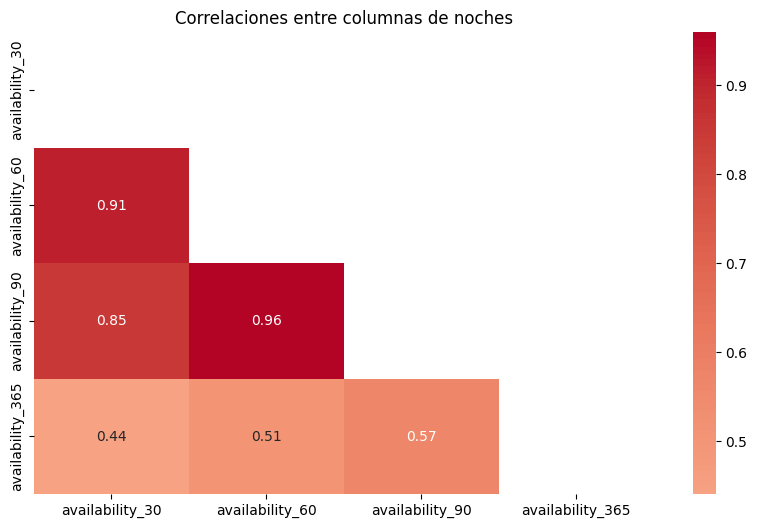

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Columnas de interés
cols = [
    "availability_30",
    "availability_60",
    "availability_90",
    "availability_365",
]

subset = dataset[cols]

corr = subset.corr(numeric_only=True).round(2)

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10,6))
sns.heatmap(corr, mask=mask, annot=True, cmap="coolwarm", center=0)
plt.title("Correlaciones entre columnas de noches")
plt.show()


Con tanta correlación entre variables, podríamos estar tentados a quedarnos solo con algunas de estas y eliminar otras. Lo cierto es que según la descripción de las columnas en la página de donde se obtuvo el archivo original, estas columnas tienen la cantidad de dias disponibles x dias en el futuro.

Sabiendo que no contamos con el calendario ni la información necesaria para obtener los valores que estas columnas presentan, decidimos no descartarlas. Algo parecido pasa con las columnas ["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm"]

Hay muchas columnas que son texto, pero solo tienen los valores "t" (True) o "f" (False), esto se puede traducir a columnas que tienen valores binarios.

In [7]:
bool_cols = ["host_is_superhost", "has_availability", "instant_bookable", "host_has_profile_pic", "host_identity_verified"]

for col in bool_cols:
    dataset[col] = dataset[col].map({'t': 1, 'f': 0})
    dataset[col] = dataset[col].fillna(0).astype(int)


Hay columnas que representan ubicaciones o que son variables cualitativas nominales, que estan representadas como texto, para estas columnas, vamos a usar Label Encoding como metodo para convertirlas en numeros y que el modelo pueda entrenarse de una forma más adecuada a partir de esta información.

In [8]:
from sklearn.preprocessing import LabelEncoder

columnas = ['host_location', 'neighbourhood', 'neighbourhood_cleansed',
            "property_type", "host_neighbourhood"]

for columna in columnas:
    le = LabelEncoder()
    dataset[columna] = le.fit_transform(dataset[columna].fillna('Unknown'))


La columna *host_since* está en formato fecha. Vamos a tener en cuenta la diferencia de dias entre hoy y esa fecha.

In [9]:
dataset["host_since"] = pd.to_datetime(dataset["host_since"], errors='coerce')

dataset["host_since"] = (pd.Timestamp.today() - dataset["host_since"]).dt.days

dataset["host_since"] = dataset["host_since"].fillna(0)

Algunas columnas como *host_response_rate* y *host_acceptance_rate* tienen un formato de string con un "%" al final, vamos a quedarnos solo con los numeros, y en caso de Nan reemplazamos por 0.

In [10]:
columnas_con_porcentaje = ["host_response_rate", "host_acceptance_rate"]

for columna in columnas_con_porcentaje:
    dataset[columna] = (
        dataset[columna]
        .str.replace("%", "", regex=False)
        .astype(float)
        .fillna(0)
    )

# Hacemos lo mismo para el precio que tiene el "$"
dataset["price"] = (
        dataset["price"]
        .str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False)
        .astype(float)
        .fillna(0)
    )


Seguimos transformando datos, la columna "amenities" es una lista de amenities para cada AirBnb. Nos gustaria que se sepa qué amenities tiene cada fila. El tema es que si queremos hacer One Hot Encoding, tenemos que tener en cuenta que los amenities pueden ser muchisimos:

In [11]:
dataset["amenities"].unique()

array(['["Cleaning products", "Dryer", "Bed linens", "Outdoor dining area", "Hot tub", "Dining table", "Luggage dropoff allowed", "Oven", "Wifi", "Free street parking", "Microwave", "Free parking on premises", "Laundromat nearby", "Drying rack for clothing", "Kitchen", "Heating", "Freezer", "Coffee maker", "Patio or balcony", "Washer", "Hot water kettle", "Dishwasher", "Hangers", "Toaster", "Refrigerator", "Long term stays allowed", "Hot water", "Wine glasses", "Portable fans", "Dedicated workspace", "Cooking basics", "Hair dryer", "High chair", "Dishes and silverware", "First aid kit", "Elevator", "Bidet", "Blender", "Housekeeping - available at extra cost", "Air conditioning", "Stove", "Iron"]',
       '["Dryer", "Bed linens", "Luggage dropoff allowed", "Extra pillows and blankets", "Wifi", "Shampoo", "Kitchen", "Heating", "Coffee maker", "Hangers", "Ethernet connection", "Refrigerator", "Long term stays allowed", "Hot water", "Dedicated workspace", "Hair dryer", "Paid parking off pr

Para solucionar esto, vamos a tener en cuenta solamente los 50 amenities mas comunes, y la cantidad de amenities de cada fila. De esta forma seguimos teniendo en cuenta el peso de muchos amenities, y conocemos la cantidad, sin tener que manejar una cantidad absurda de columnas.

In [12]:
import ast
from collections import Counter

dataset["amenities"] = dataset["amenities"].apply(lambda x: ast.literal_eval(x))

# Contar frecuencia de todos los amenities
all_amenities = [amenity for sublist in dataset["amenities"] for amenity in sublist]
amenity_counts = Counter(all_amenities)

# Seleccionar los 50 más comunes
top_50_amenities = [a for a, _ in amenity_counts.most_common(50)]

# One Hot Encoding
for amenity in top_50_amenities:
    col_name = f"has_{amenity.lower().replace(' ', '_')}"
    dataset[col_name] = dataset["amenities"].apply(lambda x: int(amenity in x))

dataset["amenities_count"] = dataset["amenities"].apply(len)

dataset = dataset.drop(columns=["amenities"])


La columna *host_verifications* es muy parecida, pero tiene poquitos valores distintos, podemos hacer One Hot Encoding

In [13]:
import ast
from sklearn.preprocessing import MultiLabelBinarizer

dataset["host_verifications"] = dataset["host_verifications"].fillna("[]")
dataset["host_verifications"] = dataset["host_verifications"].apply(ast.literal_eval)

# 2. MultiLabelBinarizer para One Hot
mlb = MultiLabelBinarizer()
host_verif_ohe = pd.DataFrame(
    mlb.fit_transform(dataset["host_verifications"]),
    columns=[f"verif_{c}" for c in mlb.classes_],
    index=dataset.index
)

dataset = pd.concat([dataset.drop(columns=["host_verifications"]), host_verif_ohe], axis=1)


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36309 entries, 0 to 36308
Data columns (total 100 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_since                                    36309 non-null  float64
 1   host_location                                 36309 non-null  int64  
 2   host_response_rate                            36309 non-null  float64
 3   host_acceptance_rate                          36309 non-null  float64
 4   host_is_superhost                             36309 non-null  int64  
 5   host_neighbourhood                            36309 non-null  int64  
 6   host_listings_count                           36288 non-null  float64
 7   host_total_listings_count                     36288 non-null  float64
 8   host_has_profile_pic                          36309 non-null  int64  
 9   host_identity_verified                        36309 non-null

Miramos de nuevo la información del dataset y podemos ver que todas las columnas son de un tipo adecuado para el entrenamiento de nuestros modelos de aprendizaje, sin embargo no hemos terminado. Tenemos que definir qué hacer con los valores faltantes, y cómo escalar variables numéricas para que nuestros modelos puedan realizar un entrenamiento más acertado a partir de ellas.

## 1.3 Valores Faltantes

In [15]:
# Análisis de valores faltantes y duplicados
print(dataset.isnull().sum())
print(f"\nValores duplicados: {dataset.duplicated().sum()}")


host_since                                         0
host_location                                      0
host_response_rate                                 0
host_acceptance_rate                               0
host_is_superhost                                  0
host_neighbourhood                                 0
host_listings_count                               21
host_total_listings_count                         21
host_has_profile_pic                               0
host_identity_verified                             0
neighbourhood                                      0
neighbourhood_cleansed                             0
latitude                                           0
longitude                                          0
property_type                                      0
accommodates                                       0
bathrooms                                       3708
bedrooms                                         777
beds                                          

Viendo cuáles son las columnas que tienen nulos, vamos a completarlos para que sean aprovechables durante el entrenamiento.

Hay muchas de ellas las cuales no sería adecuado completarlas con 0, ya que no tendría mucho sentido para lo que representan, asi que vamos a completarlas por la media.

In [16]:
null_colls = ["bedrooms", "bathrooms", "beds", "minimum_minimum_nights", "maximum_minimum_nights",
              "minimum_maximum_nights", "maximum_maximum_nights"]

for col in null_colls:
      dataset[col] = dataset[col].fillna(dataset[col].mean())

Quedan dos, las cuales rellenaremos con 0

In [17]:
last = ["host_listings_count", "host_total_listings_count"]

for col in last:
      dataset[col] = dataset[col].fillna(0)

## 1.4 Normalización

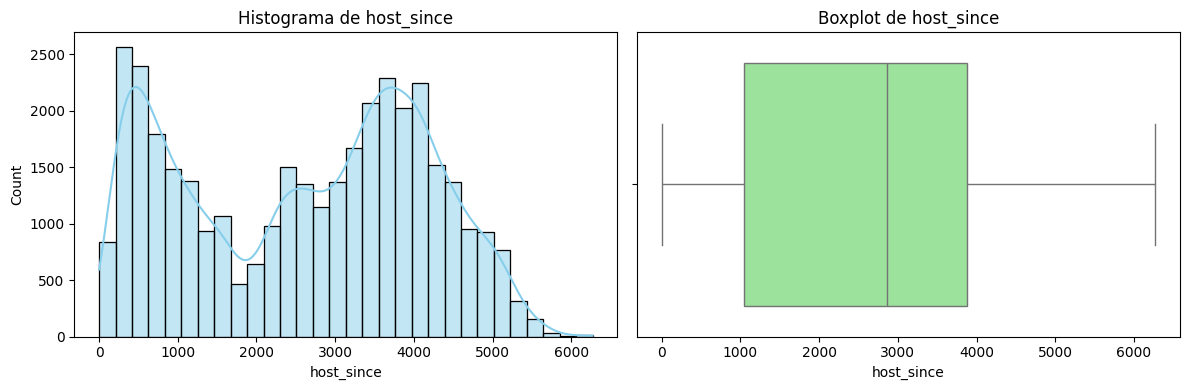

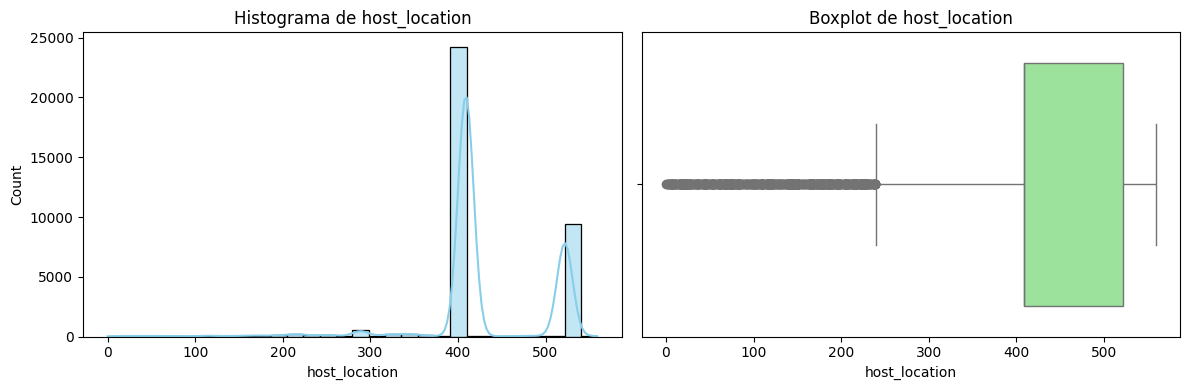

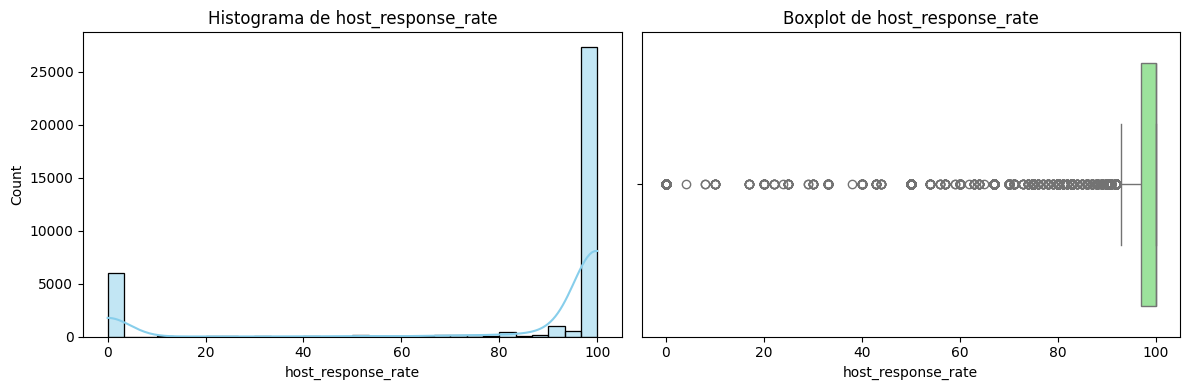

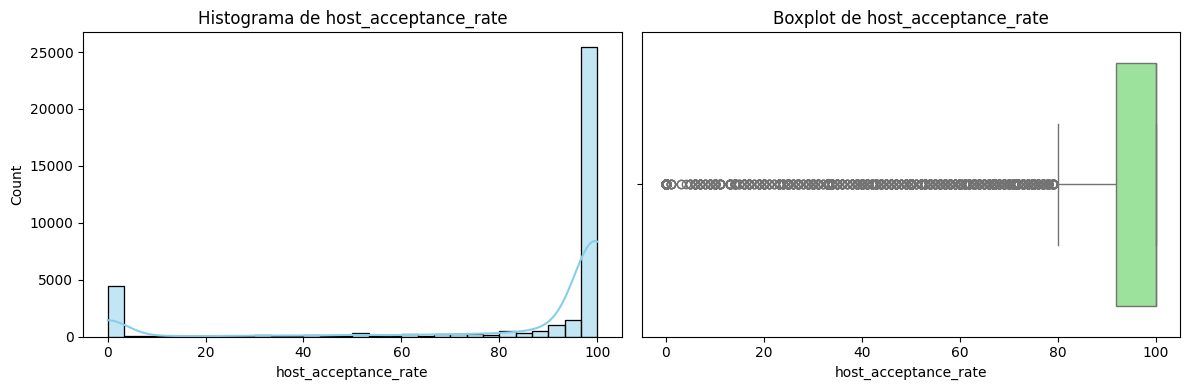

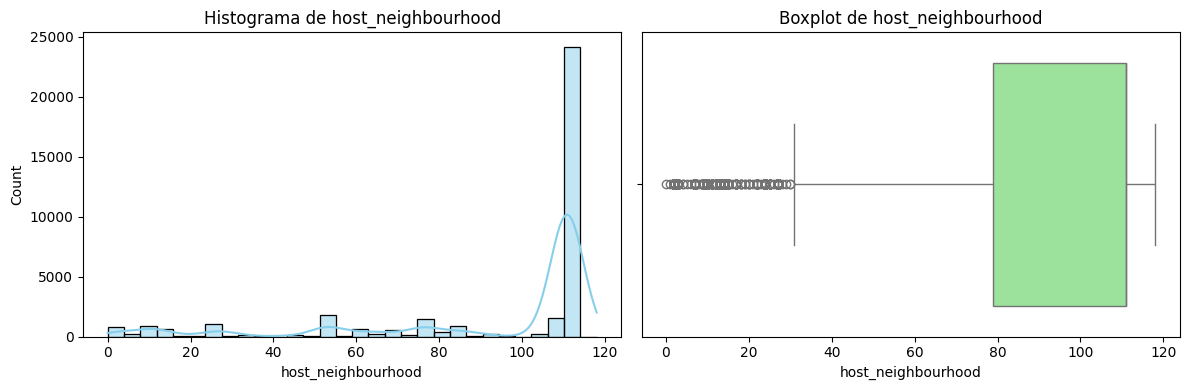

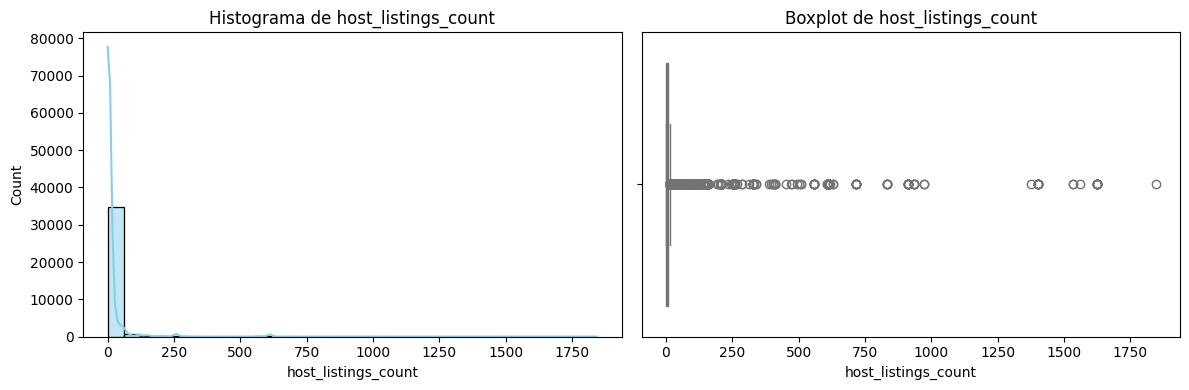

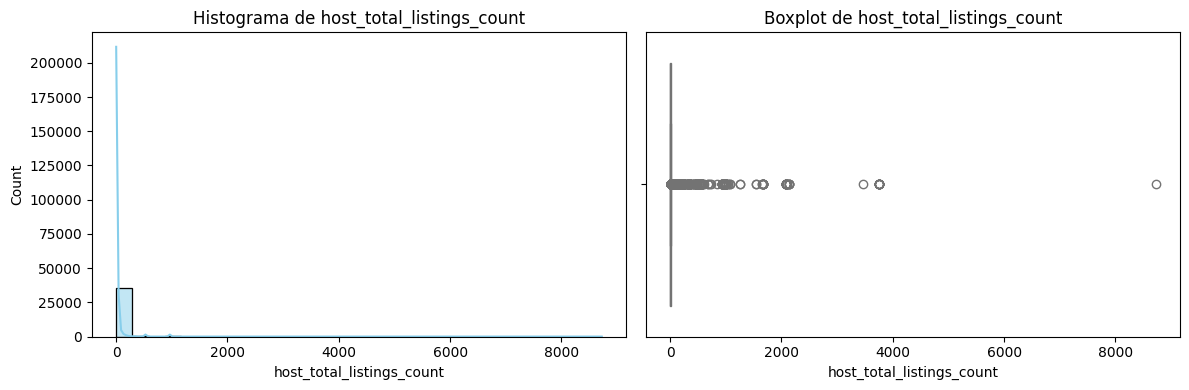

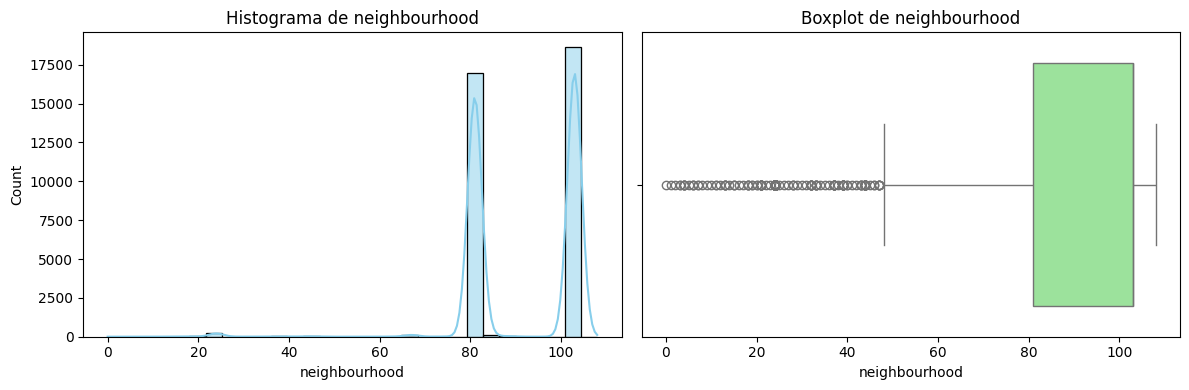

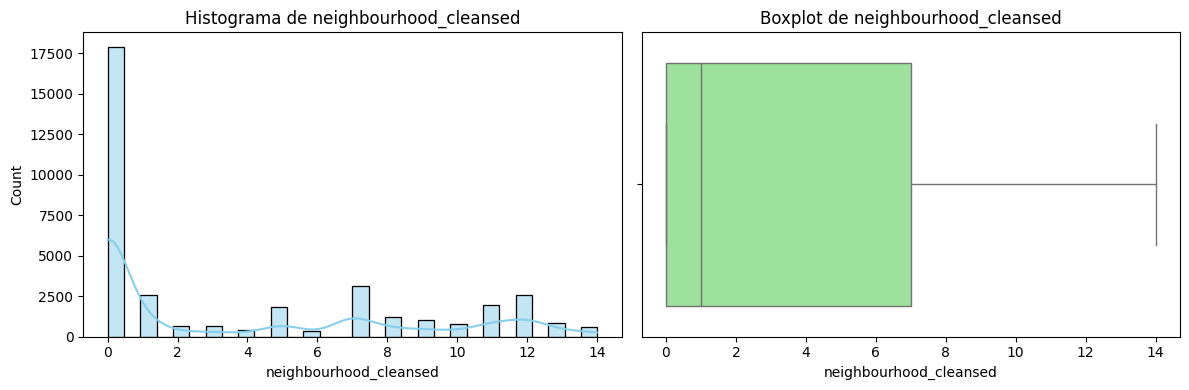

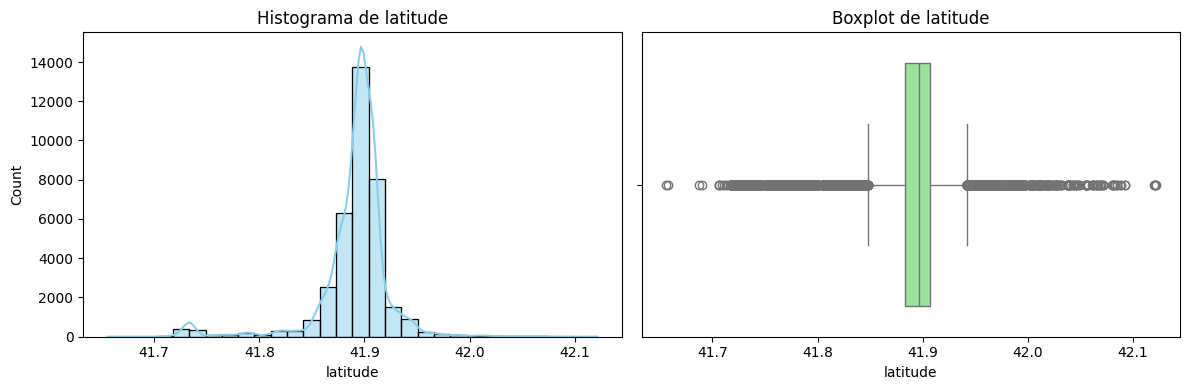

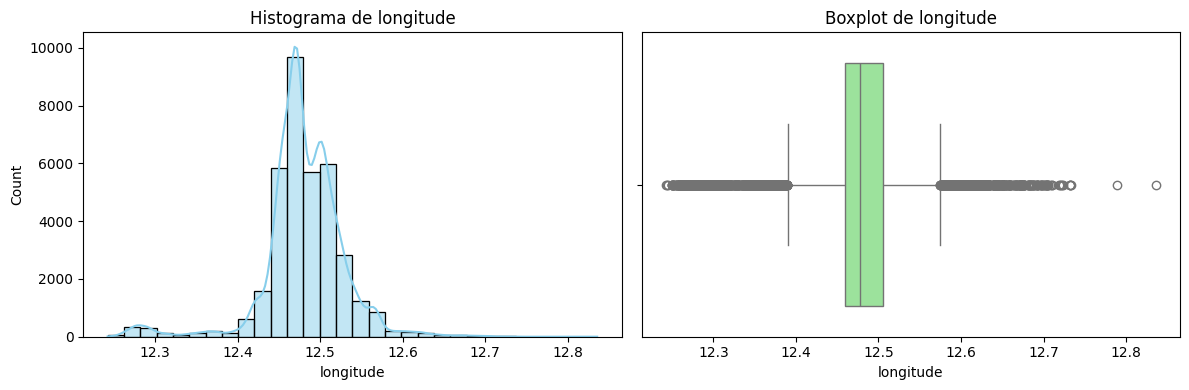

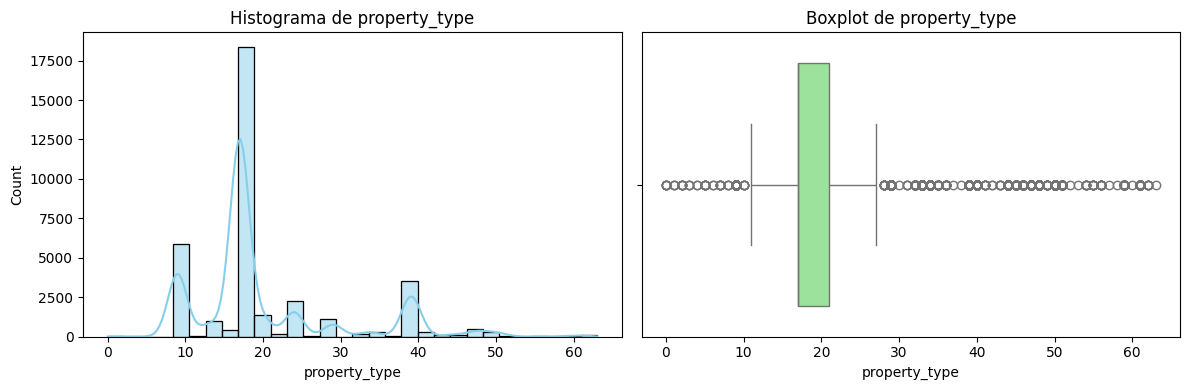

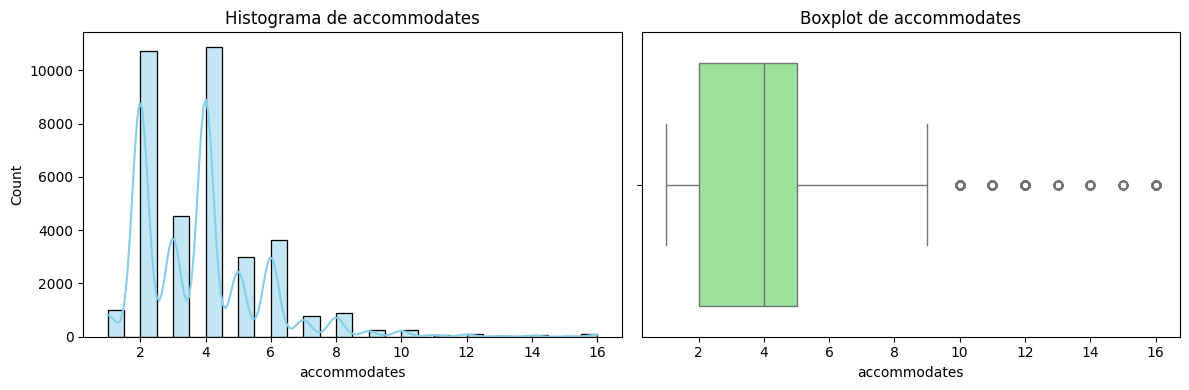

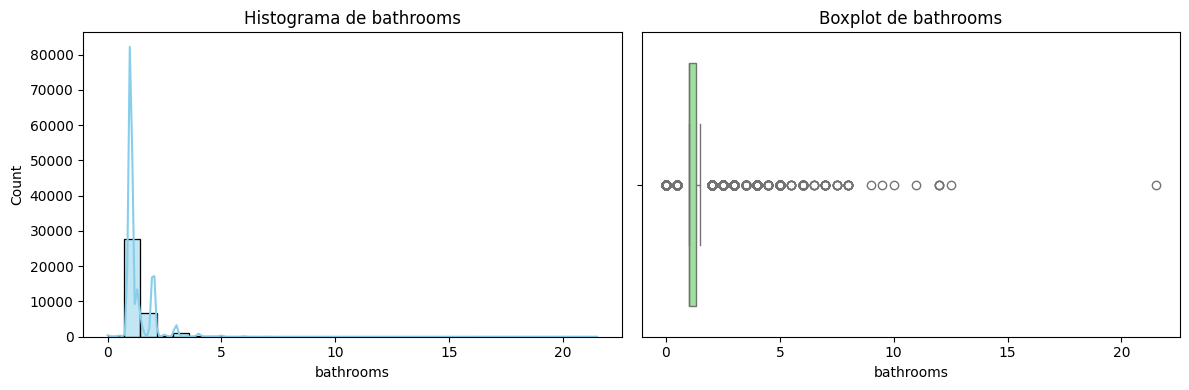

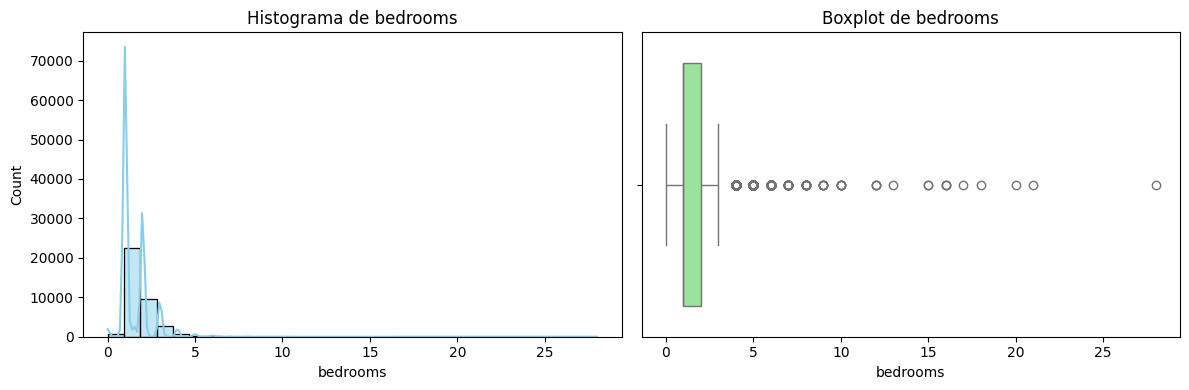

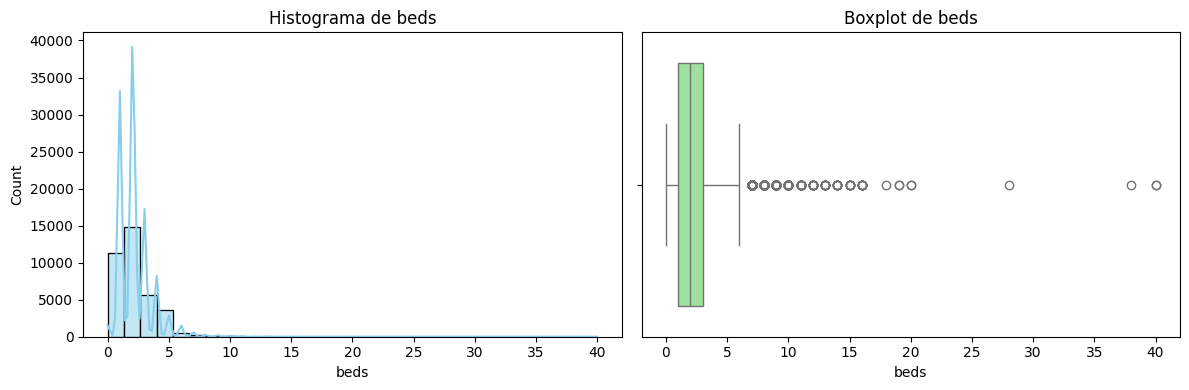

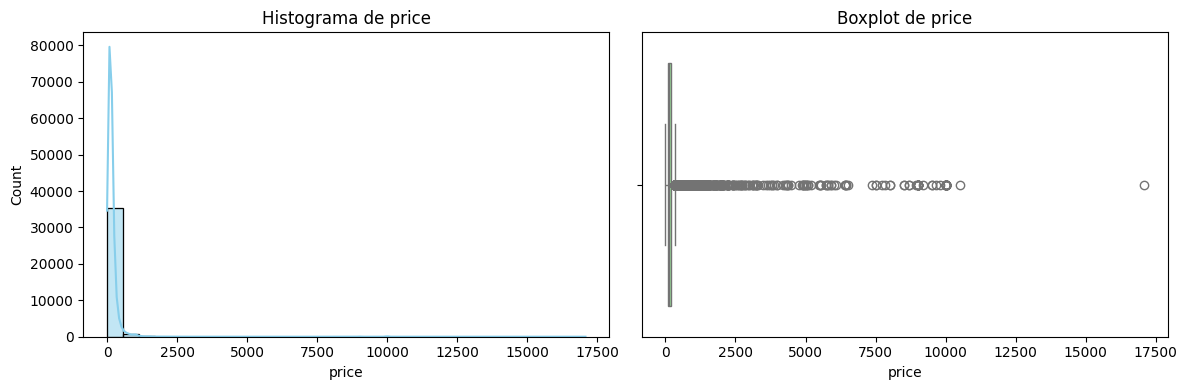

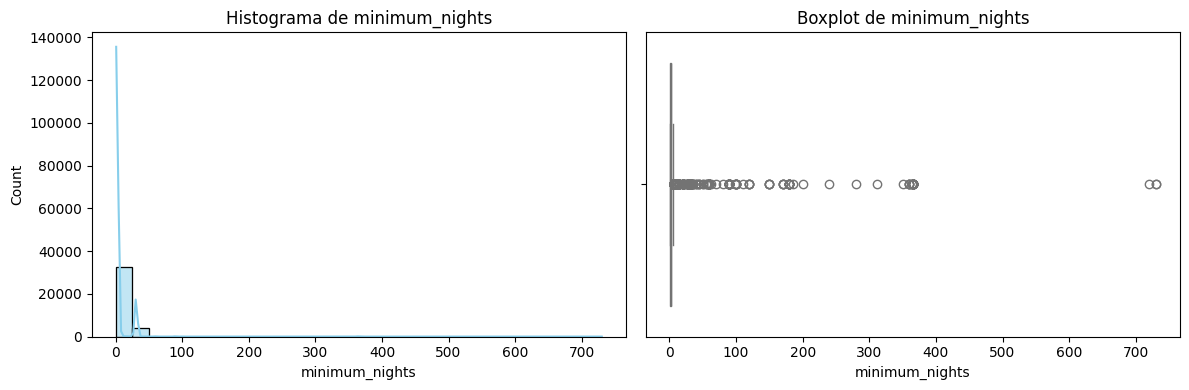

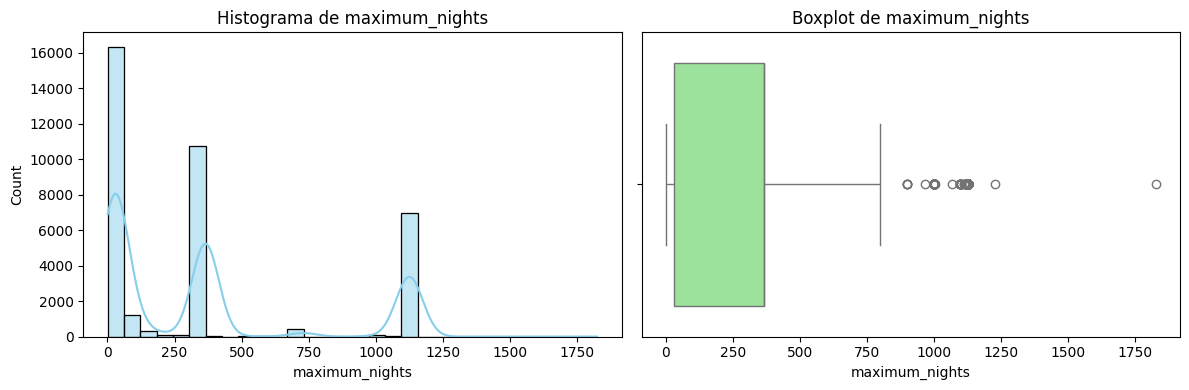

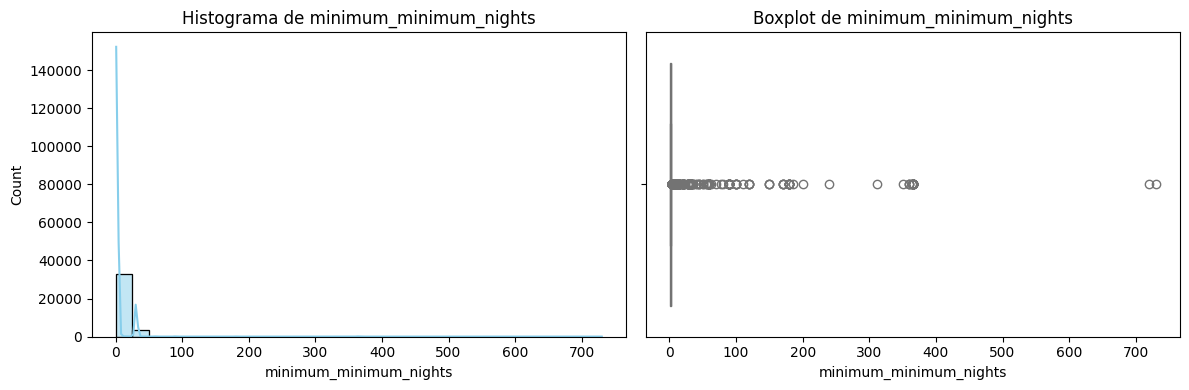

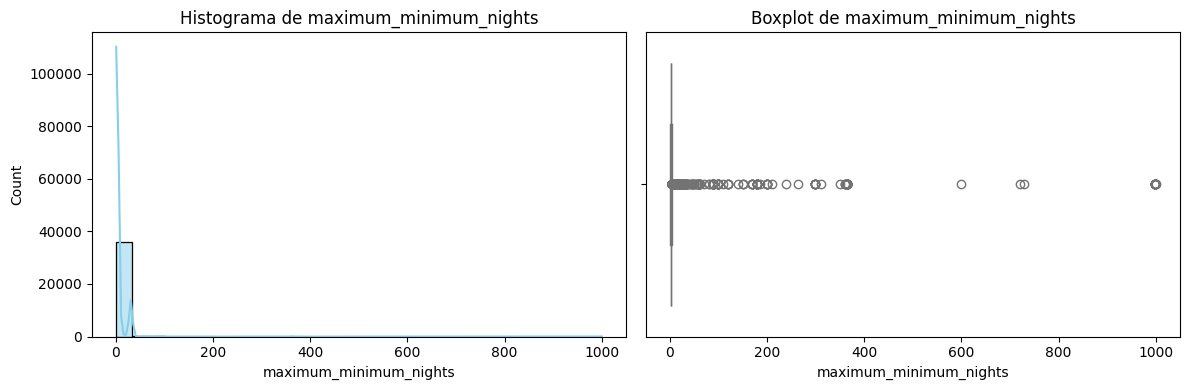

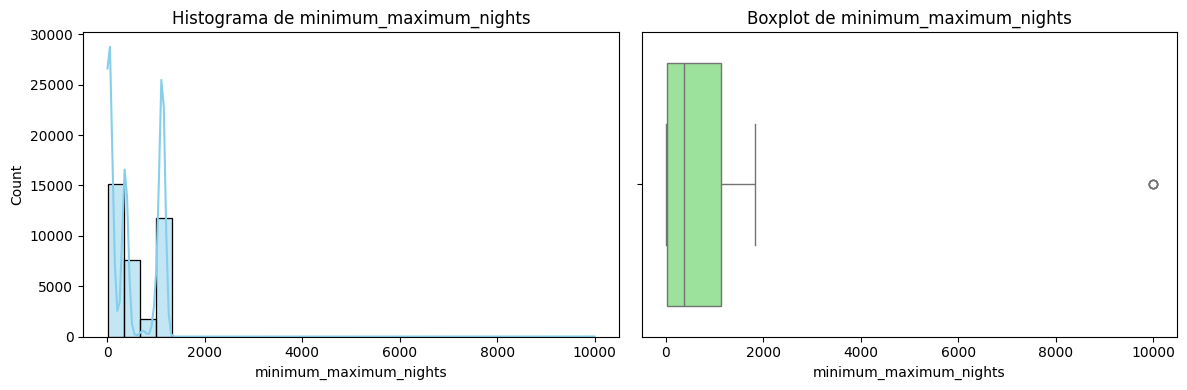

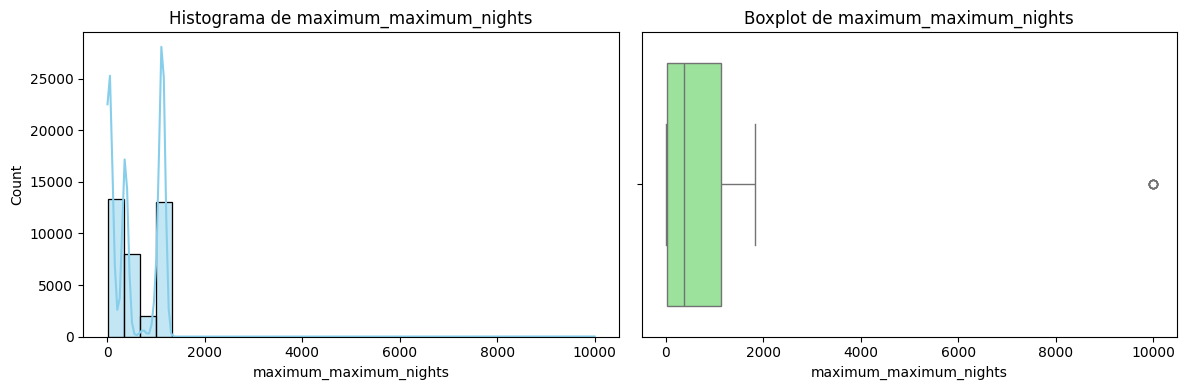

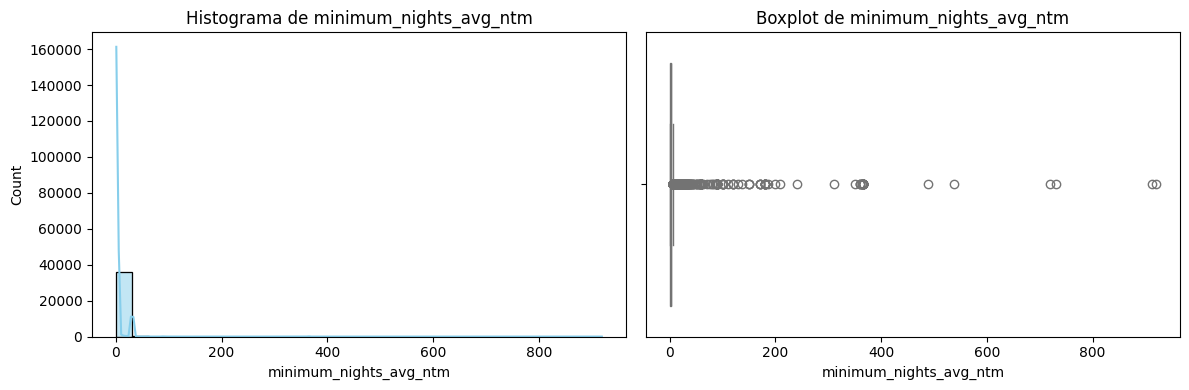

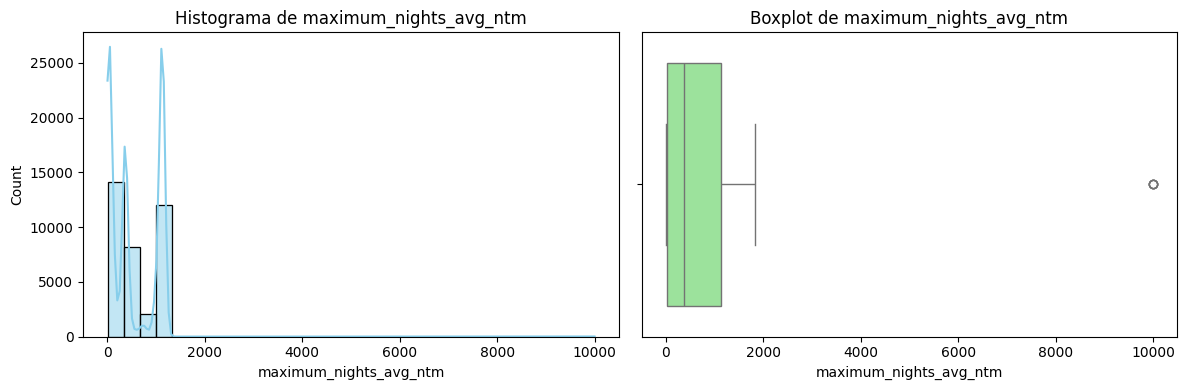

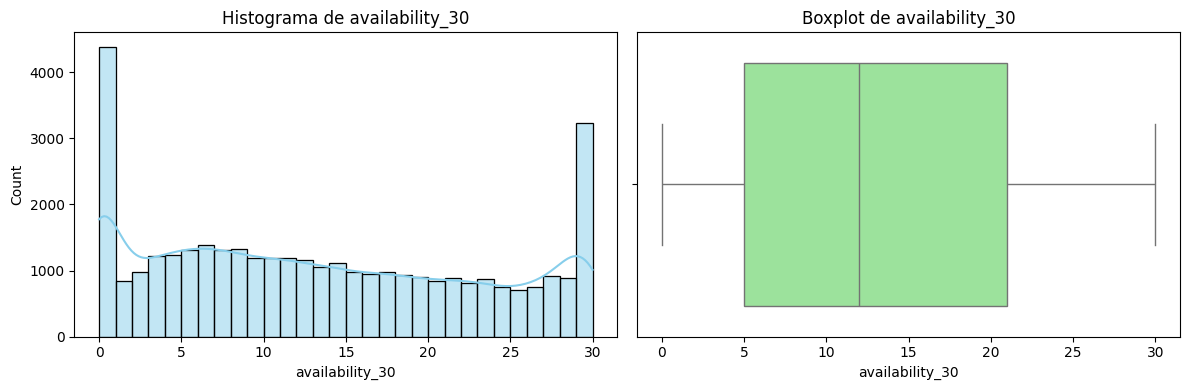

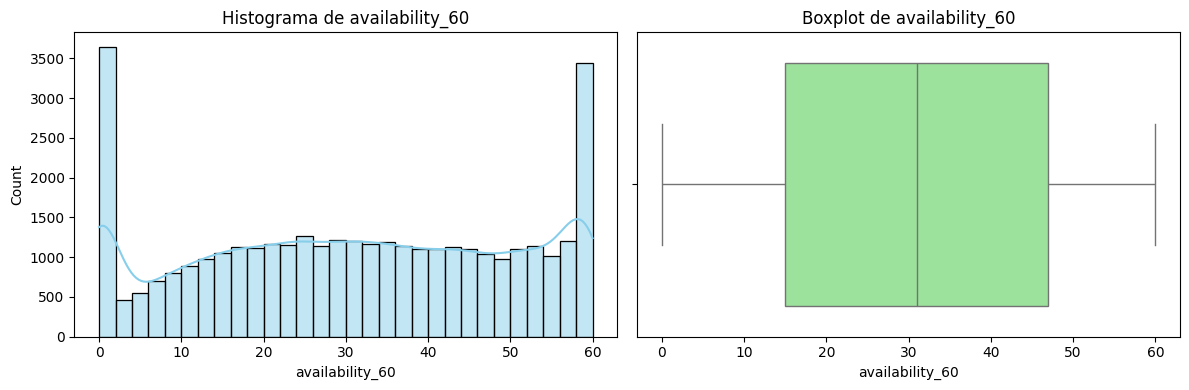

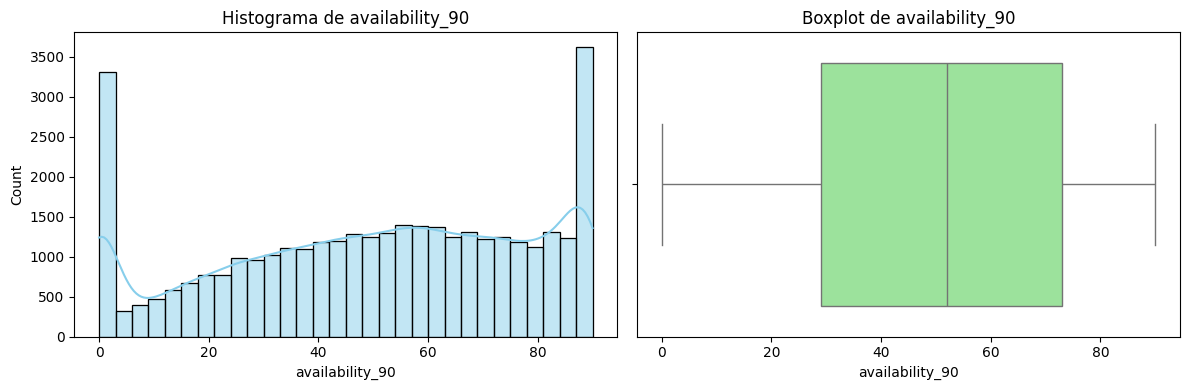

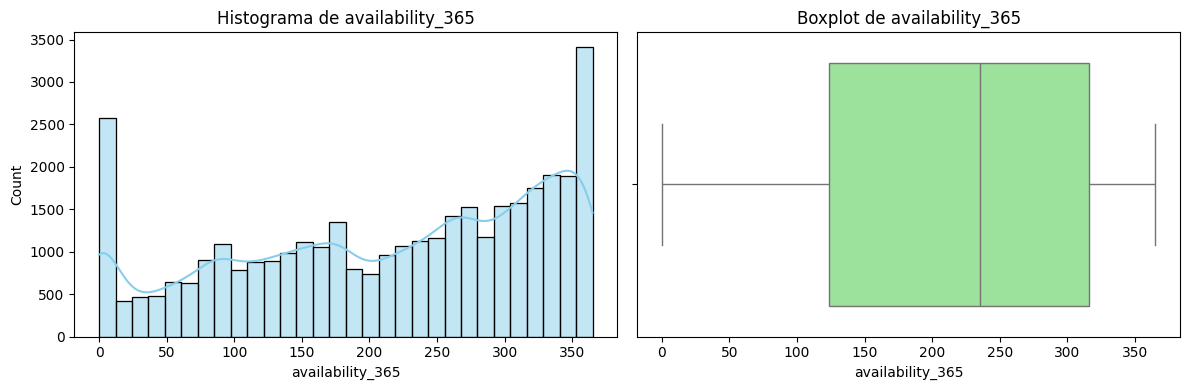

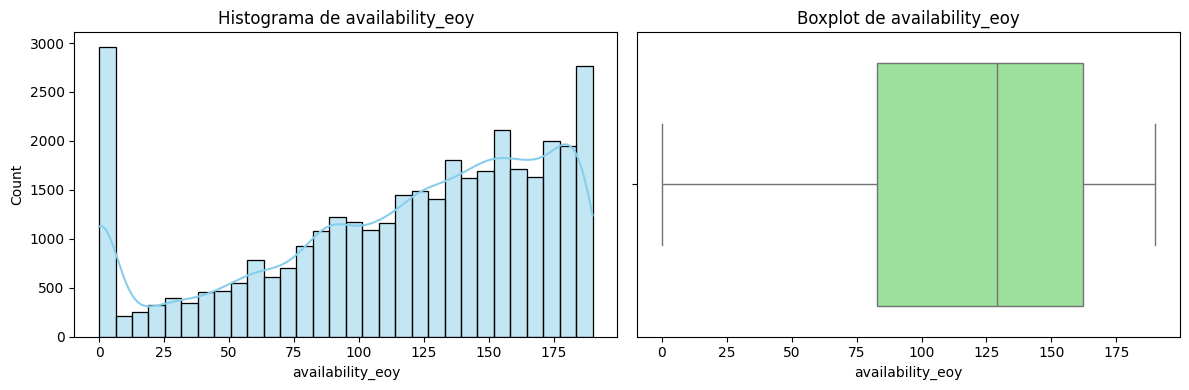

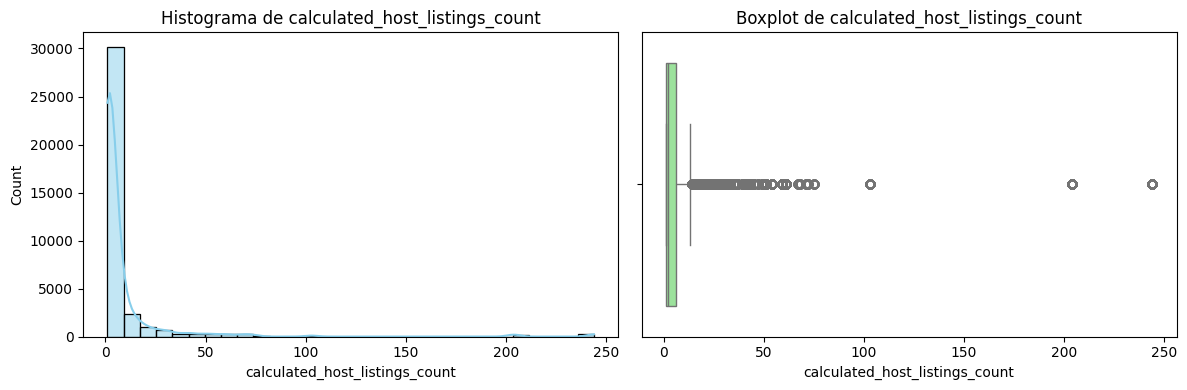

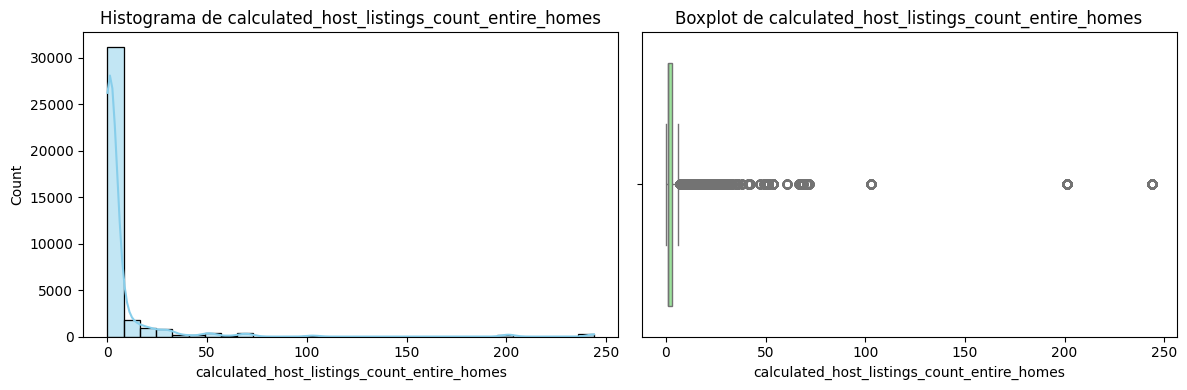

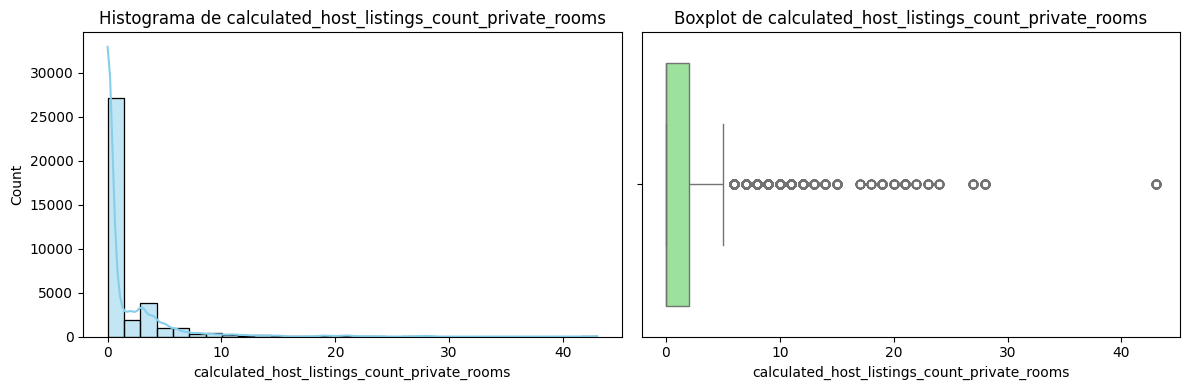

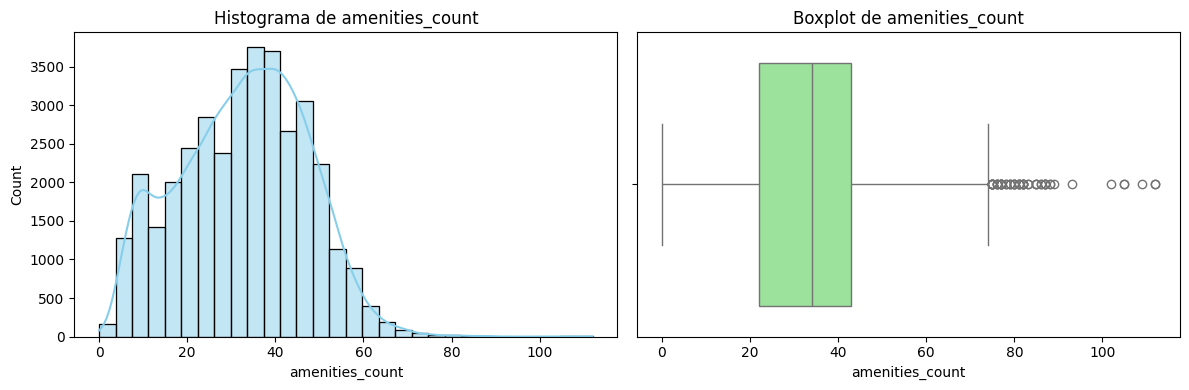

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Seleccionar columnas numéricas continuas
numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
continuous_cols = [c for c in numeric_cols if dataset[c].nunique() > 10]  # filtra variables con pocos valores distintos

# 2. Graficar histogramas y boxplots
for col in continuous_cols:
    plt.figure(figsize=(12,4))

    # Histograma
    plt.subplot(1,2,1)
    sns.histplot(dataset[col].dropna(), bins=30, kde=True, color='skyblue')
    plt.title(f'Histograma de {col}')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=dataset[col], color='lightgreen')
    plt.title(f'Boxplot de {col}')

    plt.tight_layout()
    plt.show()


Vamos a normalizar las variables segun sus caracteristicas.

In [19]:
vars_con_outliers = ["host_location", "host_response_rate", "host_acceptance_rate", "host_neighbourhood", "host_listings_count",
                      "host_total_listings_count", "neighbourhood", "latitude", "longitude", "property_type", "minimum_nights", "minimum_minimum_nights",
                     "maximum_minimum_nights", "minimum_nights_avg_ntm", "price", "calculated_host_listings_count",
                     "calculated_host_listings_count_private_rooms", "calculated_host_listings_count_entire_homes"]

# Hago Log - transform y recorto
for col in vars_con_outliers:
  dataset[col] = np.log1p(dataset[col])
  lower = dataset[col].quantile(0.01)
  upper = dataset[col].quantile(0.99)
  dataset[col] = dataset[col].clip(lower, upper)

from sklearn.preprocessing import RobustScaler
# Escalo usando el rango intercuartilico
scaler = RobustScaler()
dataset[vars_con_outliers] = scaler.fit_transform(dataset[vars_con_outliers])

# Variables no tan sesgadas que queremos escalar sus valores
vars_dist_poco_sesgada = ["amenities_count", "availability_eoy","host_since"]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataset[vars_dist_poco_sesgada] = scaler.fit_transform(dataset[vars_dist_poco_sesgada])


Con estas transformaciones, ya tenemos listo el dataset para entrenar a nuestros modelos.

# 2. Entrenamiento y Predicción
En esta sección entrenamos distintos modelos de regresión para predecir nuestro target. Para evaluar su desempeño, utilizamos las siguientes métricas:

MAE (Mean Absolute Error): Error promedio en valor absoluto; nos dice, en promedio, cuánto se desvía la predicción del valor real.

RMSE (Root Mean Squared Error): Raíz del error cuadrático medio; penaliza más los errores grandes y refleja la dispersión de los errores.

R² (Coeficiente de determinación): Proporción de varianza explicada por el modelo; valores cercanos a 1 indican que el modelo explica bien la variabilidad de los datos.

Cada modelo se entrena con los datos de entrenamiento y se evalúa tanto en train como en test para observar posibles problemas de sobreajuste.

## 2.1 División del dataset

Con el dataset preprocesado, vamos a dividir en dataset en dos porciones. El 80% será de entrenamiento, y el 20% sera de prueba, para evaluar con qué precision el modelo puede predecir el precio de alquiler.

In [20]:
from sklearn.model_selection import train_test_split

X = dataset.drop(columns=['price'])
y = dataset['price']

# Partición del dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 2.2 Regresión Lineal

In [22]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import joblib
from google.colab import files

# Entrenar
model = LinearRegression()
model.fit(X_train, y_train)

joblib.dump(model, "modelo_regresion_lineal.joblib")
files.download("modelo_regresion_lineal.joblib")

y_pred_train_lineal = model.predict(X_train)
y_pred_test_lineal = model.predict(X_test)

print("=== Train ===")
print("MAE:", mean_absolute_error(y_train, y_pred_train_lineal))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train_lineal)))
print("R²:", r2_score(y_train, y_pred_train_lineal))

print("\n=== Test ===")
print("MAE:", mean_absolute_error(y_test, y_pred_test_lineal))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_lineal)))
print("R²:", r2_score(y_test, y_pred_test_lineal))

coef = pd.Series(model.coef_, index=X_train.columns)
coef_abs = coef.abs().sort_values(ascending=False)

print("Top 20 variables más influyentes (Linear Regression):")
print(coef_abs.head(20))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

=== Train ===
MAE: 1.0373185223505048
RMSE: 1.652698370530547
R²: 0.2952111054801788

=== Test ===
MAE: 1.03965386580747
RMSE: 1.6452214732659451
R²: 0.2806541085129779
Top 20 variables más influyentes (Linear Regression):
has_availability                               1.913723
room_type_Hotel room                           1.102621
host_response_time_nan                         0.501360
host_response_time_within a day                0.349668
bathrooms                                      0.296036
availability_eoy                               0.291247
calculated_host_listings_count                 0.271678
amenities_count                                0.267381
verif_phone                                    0.250701
host_is_superhost                              0.216634
minimum_minimum_nights                         0.178515
has_free_street_parking                        0.156551
host_listings_count                            0.153781
has_central_heating                            0.

Viendo los resultados podemos decir lo siguiente:
- MAE y RMSE son muy parecidos en train y test, lo cual nos dice que no hay overfitting.

- El R² (Coeficiente de determinacion) es muy bajo, solo del 28%, que es el porcentaje de la varianza que el modelo logra explicar. Esto nos dice que el dato no esta capturando la complejidad del problema.

- El modelo interpreta variables de distinta indole como importantes en la variabilidad del precio.

## 2.3 XGBoost

Para este modelo, con el objetivo de optimizar hiperparámetros, vamos a proponer un XGBoost Regressor utilizando búsqueda aleatoria (RandomizedSearchCV) con validación cruzada de 5 folds (KFold). Se seleccionaron rangos de hiperparámetros relevantes para controlar la complejidad del modelo, la tasa de aprendizaje, la regularización y la selección de submuestras, con el fin de minimizar el error y maximizar el coeficiente de determinación (R²) en datos no vistos, además de prevenir el overfitting.

El mejor modelo se obtiene a partir del promedio de R² en los folds de validación, y luego se evalúa sobre los conjuntos de entrenamiento y test utilizando MAE, RMSE y R² para analizar desempeño y capacidad de generalización.

In [23]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, KFold
import joblib
from google.colab import files

# Modelo Base
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    tree_method='hist',
    device='cuda'
)

# Hiperparámetros a optimizar
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [2, 3],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.6, 0.7],
    'colsample_bytree': [0.6, 0.7],
    'reg_alpha': [0.5, 1, 2],
    'reg_lambda': [2, 3, 4]
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,
    scoring='r2',
    cv=kf,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Entreno
random_search.fit(X_train, y_train)
joblib.dump(model, "modelo_XGBoost_ej3.joblib")
files.download("modelo_XGBoost_ej3.joblib")

# Mejor estimador
best_model = random_search.best_estimator_

y_pred_train_boost = best_model.predict(X_train)
y_pred_test_boost = best_model.predict(X_test)

print("=== Train ===")
print("MAE:", mean_absolute_error(y_train, y_pred_train_boost))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train_boost)))
print("R²:", r2_score(y_train, y_pred_train_boost))

print("\n=== Test ===")
print("MAE:", mean_absolute_error(y_test, y_pred_test_boost))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_boost)))
print("R²:", r2_score(y_test, y_pred_test_boost))


Fitting 5 folds for each of 50 candidates, totalling 250 fits


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

=== Train ===
MAE: 0.33258533159810266
RMSE: 0.4723823987562048
R²: 0.9424216429151899

=== Test ===
MAE: 0.34387982223444585
RMSE: 0.4904817721527644
R²: 0.9360655735461355


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:729: UserWarning: [23:22:05] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


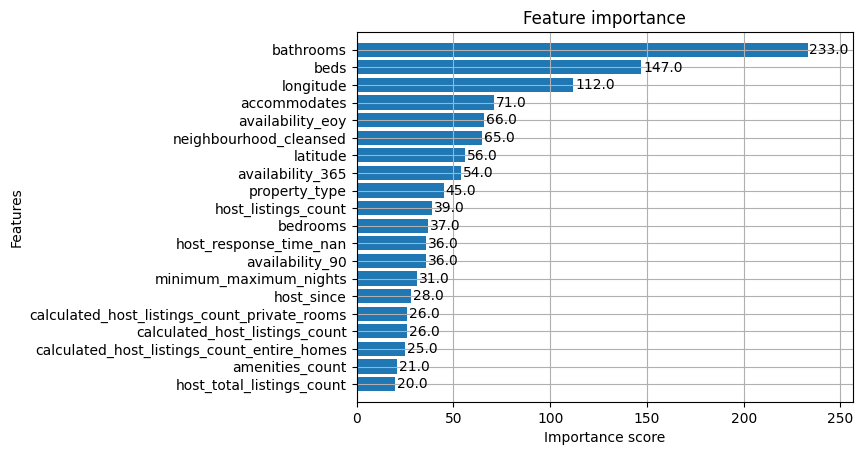

In [24]:
# Miramos las variables más importantes para el modelo
xgb.plot_importance(best_model, max_num_features=20, importance_type='weight', height=0.8)
plt.show()

Con estos otros resultados, podemos concluir:

-  MAE y RMSE son mucho mas bajos, es decir que las predicciones son más acertadas.

- R² es altisimo tanto en train como en test, lo que explica que el modelo captura el 96% de la varianza de los datos, y que no hay overfitting, es decir que el modelo no esta "memorizando", sino que generaliza muy y captura la complejidad correctamente.

- Le da mucha importancia a features que logicamente aumentan el precio de un alquiler, como bathrooms, beds, accomodates, ubicacion, entre otros.

## 2.4 Random Forest

Random Forest fue el modelo opcional elegido para el tercer entrenamiento por las siguientes razones:
- Es un modelo de ensamble, que como vimos es un tipo de modelo que funciona bien para este problema y regresión en general.
- Utiliza bagging en lugar de boosting, como si lo hace XGBoost, asi que nos pareción interesante comparar la performance de estas dos técnicas de aprendizaje.
- Se puede entrenar con cross-validation para elegir hiperparámetros.

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import joblib
from google.colab import files

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [2, 3],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="r2", n_jobs=-1)

# Entrenamiento
grid_search.fit(X_train, y_train)
joblib.dump(model, "modelo_RandomForest_ej3.joblib")
files.download("modelo_RandomForest_ej3.joblib")

best_rf = grid_search.best_estimator_

y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

print("=== Train ===")
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R²:", r2_score(y_train, y_train_pred))

print("\n=== Test ===")
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R²:", r2_score(y_test, y_test_pred))

importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 20 variables más influyentes (Random Forest):")
print(importances.head(20))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

=== Train ===
MAE: 0.4490429612568852
RMSE: 0.6368879567312306
R²: 0.8953358555678158

=== Test ===
MAE: 0.4588842137322005
RMSE: 0.6501708809214136
R²: 0.8876575065428343

Top 20 variables más influyentes (Random Forest):
bathrooms                                       0.637970
availability_365                                0.345771
neighbourhood_cleansed                          0.008783
beds                                            0.007226
host_since                                      0.000145
calculated_host_listings_count_private_rooms    0.000030
longitude                                       0.000026
property_type                                   0.000024
calculated_host_listings_count                  0.000011
has_availability                                0.000006
host_identity_verified                          0.000004
accommodates                                    0.000002
host_listings_count                             0.000002
latitude                            

Teniendo los resultados podemos realizar algunas observaciones:

- Aunque todas las métricas son un poco peor a las que obtuvimos con XGBoost, son muy buenas todavía, es decir que el modelo interpretó muy bien la complejidad del problema, generando buenas predicciones, y sin tener overfitting, un aspecto importante a evitar.
- Las variables que tuvieron un importante aporte a las predicciones no son muchas, hay varias que tienen 0 de "importancia"

#3. Comparación de Resultados

## Métricas

| Modelo            | Train MAE | Train RMSE | Train R² | Test MAE | Test RMSE | Test R² |
| ----------------- | --------- | ---------- | -------- | -------- | --------- | ------- |
| Linear Regression | 1.037     | 1.653      | 0.295    | 1.040    | 1.645     | 0.281   |
| XGBoost           | 0.333     | 0.472      | 0.942    | 0.344    | 0.490     | 0.936   |
| Random Forest     | 0.449     | 0.638      | 0.895    | 0.459    | 0.650     | 0.888   |


Observaciones:

- Regresion Lineal: Muy pobre, solo explica 28–29% de la varianza, lo que significa que el modelo lineal es demasiado simple y no logra capturar bien la complejidad del problema.

- XGBoost: Mejor desempeño absoluto, MAE y RMSE más bajos y R² muy alto (~0.94). Muy buena capacidad de predicción y generalización.

- Random Forest: También muy bueno, R² ≈ 0.89, un poco peor que XGBoost, pero aún ofrece predicciones muy acertadas. Es otra propuesta de modelo de ensambles.

## Conclusiones
La Regresión Lineal resultó ser demasiado simple para este dataset, es más util como base o para interpretar relaciones lineales.

Por otro lado, los modelos de ensamble, XGBoost y Random Forest fueron mucho más precisos. Aunque fue XGBoost el mejor predictor, ambos manejaron bien la no linealidad y las interacciones. Es interesante remarcar que Random Forest fue menos sensible al overfitting, a diferencia de XGBoost que requirió una tarea de optimización de hiper-parámetros mas minuciosa.